In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
import sys
os.chdir('/content/drive/My Drive/ProyectoIA2/generative-spectral-datasets')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import numpy as np
from models.main import make_encoder, make_generator, make_discriminator, spectralGAN, spectralGen
from models.utils import discriminator_loss, autoencoder_loss, generator_loss, spacial_tv, soft_threshold
from models.metrics import PSNR, SSIM
from data import load_dataset

import matplotlib.pyplot as plt

input_shape = (512,512,31)

In [3]:
BATCH_SIZE = 1

train_params = dict(
    batch_size = BATCH_SIZE,
    shuffle = True,
    cache = True
)

test_params = dict(
    batch_size = BATCH_SIZE,
    cache = True
)

_ , test_ds = load_dataset( train_params = train_params, test_params = test_params)

In [4]:
FACTOR = [ 1 , 1 , 1/2 , 1/2 , 1/4, 1/8]
features= 64

encoder = make_encoder(input_shape, features=features, factors=FACTOR)
generator = make_generator(input_shape, features=features, factors=FACTOR)
discriminator = make_discriminator(input_shape)

In [5]:
encoder.summary()
generator.summary()
discriminator.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 31)]    0         
_________________________________________________________________
encoder (Encoder)            (None, 512, 512, 8)       59184     
Total params: 59,184
Trainable params: 59,184
Non-trainable params: 0
_________________________________________________________________
Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 8)]     0         
_________________________________________________________________
generator (Generator)        (None, 512, 512, 31)      59230     
Total params: 59,230
Trainable params: 59,230
Non-trainable params: 0
_________________________________________________________________
Model: "discriminator"
_________

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = spectralGAN(encoder=encoder, generator=generator, discriminator=discriminator)

model.compile(
    a_optimizer = tf.keras.optimizers.Adam(1e-4),
    d_optimizer = tf.keras.optimizers.Adam(1e-4),
    a_loss = autoencoder_loss,
    d_loss = discriminator_loss,
    metrics = [ PSNR() ]
)


x0 = tf.constant(0. , shape=(1,) + input_shape)
model.__call__(x0)
model.load_weights('spectralGAN.h5')

In [7]:
metrics = model.evaluate(test_ds)

3/3 [==============================] - 2s 423ms/step - a_loss: -5.4461e-05 - d_loss: 1.3955 - psnr: 41.1308 - real_acc: 0.4889 - fake_acc: 0.4486


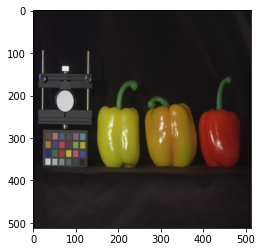

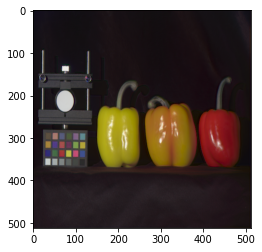

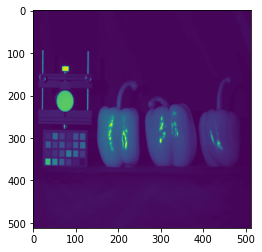

In [8]:
sample = next(iter(test_ds))
target = tf.reduce_mean( sample, axis=-1, keepdims=True)

alpha = encoder.predict(sample)
generated = generator.predict(alpha)

num = 0
RGB = [ 24, 15 , 5]

x_true = np.power( sample, 0.5 )
x_pred = np.power( generated, 0.5 )

plt.imshow(x_true[num][:,:,RGB])
plt.show()

plt.imshow(x_pred[num][:,:,RGB])
plt.show()

plt.imshow(target[0, : ,:, 0])
plt.show()


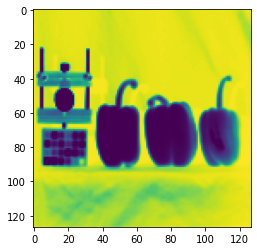

Epoch 1/200
1/1 [==============================] - 5s 5s/step - loss: 3.0648 - accuracy: 0.0019
Epoch 2/200
1/1 [==============================] - 0s 248ms/step - loss: 3.1074 - accuracy: 0.2629
Epoch 3/200
1/1 [==============================] - 0s 265ms/step - loss: 3.1193 - accuracy: 0.5226
Epoch 4/200
1/1 [==============================] - 0s 281ms/step - loss: 2.9804 - accuracy: 0.6160
Epoch 5/200
1/1 [==============================] - 0s 260ms/step - loss: 2.8463 - accuracy: 0.6886
Epoch 6/200
1/1 [==============================] - 0s 257ms/step - loss: 2.7253 - accuracy: 0.7353
Epoch 7/200
1/1 [==============================] - 0s 270ms/step - loss: 2.6147 - accuracy: 0.7560
Epoch 8/200
1/1 [==============================] - 0s 269ms/step - loss: 2.5128 - accuracy: 0.7748
Epoch 9/200
1/1 [==============================] - 0s 272ms/step - loss: 2.4182 - accuracy: 0.7917
Epoch 10/200
1/1 [==============================] - 0s 273ms/step - loss: 2.3312 - accuracy: 0.8072
Epoch 11/200

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


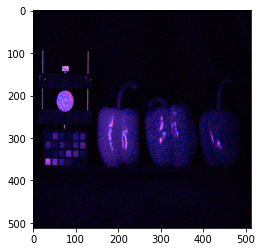

Epoch 1/200
1/1 [==============================] - 0s 312ms/step - loss: 0.3624 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 277ms/step - loss: 0.3622 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 256ms/step - loss: 0.3618 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 263ms/step - loss: 0.3616 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 264ms/step - loss: 0.3613 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 267ms/step - loss: 0.3610 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 261ms/step - loss: 0.3607 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 267ms/step - loss: 0.3604 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 267ms/step - loss: 0.3602 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 264ms/step - loss: 0.3598 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


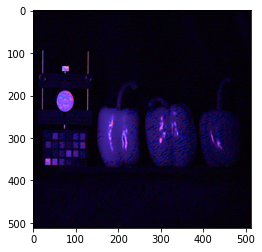

Epoch 1/200
1/1 [==============================] - 0s 283ms/step - loss: 0.3476 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 265ms/step - loss: 0.3475 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 276ms/step - loss: 0.3473 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 265ms/step - loss: 0.3472 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 255ms/step - loss: 0.3471 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 256ms/step - loss: 0.3471 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 264ms/step - loss: 0.3471 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 274ms/step - loss: 0.3470 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 269ms/step - loss: 0.3470 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 266ms/step - loss: 0.3468 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


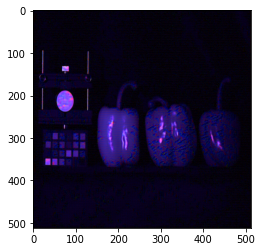

Epoch 1/200
1/1 [==============================] - 0s 302ms/step - loss: 0.3524 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 266ms/step - loss: 0.3524 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 261ms/step - loss: 0.3524 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 259ms/step - loss: 0.3522 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 264ms/step - loss: 0.3524 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 258ms/step - loss: 0.3523 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 259ms/step - loss: 0.3523 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 260ms/step - loss: 0.3523 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 274ms/step - loss: 0.3523 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 259ms/step - loss: 0.3524 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


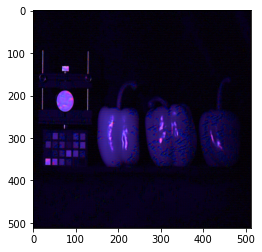

Epoch 1/200
1/1 [==============================] - 0s 268ms/step - loss: 0.3631 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 259ms/step - loss: 0.3632 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 267ms/step - loss: 0.3632 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 265ms/step - loss: 0.3632 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 263ms/step - loss: 0.3631 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 261ms/step - loss: 0.3632 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 269ms/step - loss: 0.3630 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 262ms/step - loss: 0.3630 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 261ms/step - loss: 0.3631 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 265ms/step - loss: 0.3632 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


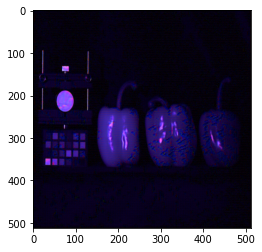

Epoch 1/200
1/1 [==============================] - 0s 273ms/step - loss: 0.3766 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 256ms/step - loss: 0.3767 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 253ms/step - loss: 0.3766 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 262ms/step - loss: 0.3766 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 270ms/step - loss: 0.3765 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 262ms/step - loss: 0.3766 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 280ms/step - loss: 0.3765 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 268ms/step - loss: 0.3765 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 260ms/step - loss: 0.3766 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 272ms/step - loss: 0.3765 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


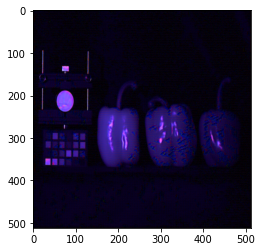

Epoch 1/200
1/1 [==============================] - 0s 301ms/step - loss: 0.3917 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 270ms/step - loss: 0.3917 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 264ms/step - loss: 0.3917 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 269ms/step - loss: 0.3918 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 273ms/step - loss: 0.3918 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 260ms/step - loss: 0.3917 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 271ms/step - loss: 0.3917 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 258ms/step - loss: 0.3917 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 272ms/step - loss: 0.3916 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 270ms/step - loss: 0.3916 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


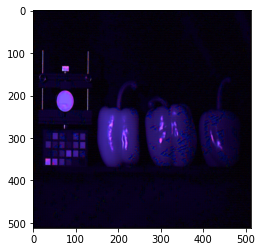

Epoch 1/200
1/1 [==============================] - 0s 278ms/step - loss: 0.4072 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 266ms/step - loss: 0.4073 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 260ms/step - loss: 0.4073 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 263ms/step - loss: 0.4071 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 260ms/step - loss: 0.4071 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 266ms/step - loss: 0.4072 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 258ms/step - loss: 0.4072 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 275ms/step - loss: 0.4071 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 263ms/step - loss: 0.4072 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 275ms/step - loss: 0.4073 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


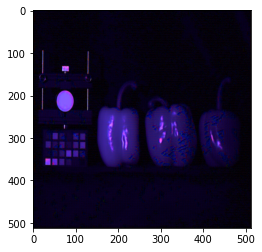

Epoch 1/200
1/1 [==============================] - 0s 337ms/step - loss: 0.4231 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 282ms/step - loss: 0.4229 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 265ms/step - loss: 0.4230 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 257ms/step - loss: 0.4229 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 262ms/step - loss: 0.4228 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 261ms/step - loss: 0.4228 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 269ms/step - loss: 0.4227 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 260ms/step - loss: 0.4229 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 276ms/step - loss: 0.4228 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 258ms/step - loss: 0.4229 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


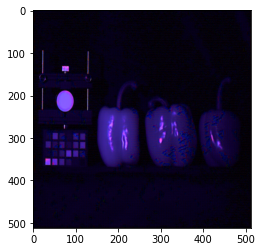

Epoch 1/200
1/1 [==============================] - 0s 316ms/step - loss: 0.4386 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 270ms/step - loss: 0.4384 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 256ms/step - loss: 0.4384 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 267ms/step - loss: 0.4384 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 321ms/step - loss: 0.4384 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 259ms/step - loss: 0.4383 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 272ms/step - loss: 0.4385 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 256ms/step - loss: 0.4385 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 266ms/step - loss: 0.4385 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 270ms/step - loss: 0.4387 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


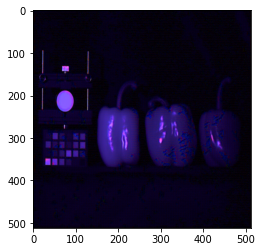

Epoch 1/200
1/1 [==============================] - 0s 278ms/step - loss: 0.4534 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 268ms/step - loss: 0.4534 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 257ms/step - loss: 0.4533 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 273ms/step - loss: 0.4533 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 253ms/step - loss: 0.4533 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 264ms/step - loss: 0.4533 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 256ms/step - loss: 0.4533 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 268ms/step - loss: 0.4535 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 278ms/step - loss: 0.4535 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 260ms/step - loss: 0.4534 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


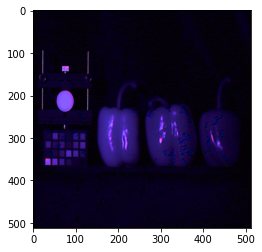

Epoch 1/200
1/1 [==============================] - 0s 290ms/step - loss: 0.4679 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 270ms/step - loss: 0.4679 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 257ms/step - loss: 0.4678 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 278ms/step - loss: 0.4677 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 259ms/step - loss: 0.4678 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 260ms/step - loss: 0.4678 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 267ms/step - loss: 0.4678 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 257ms/step - loss: 0.4677 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 269ms/step - loss: 0.4678 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 261ms/step - loss: 0.4679 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


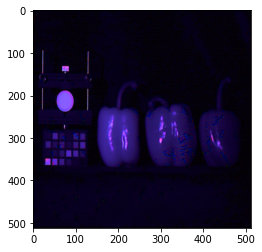

Epoch 1/200
1/1 [==============================] - 0s 307ms/step - loss: 0.4819 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 263ms/step - loss: 0.4817 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 270ms/step - loss: 0.4817 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 277ms/step - loss: 0.4817 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 264ms/step - loss: 0.4818 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 269ms/step - loss: 0.4817 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 274ms/step - loss: 0.4818 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 265ms/step - loss: 0.4819 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 265ms/step - loss: 0.4819 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 275ms/step - loss: 0.4820 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


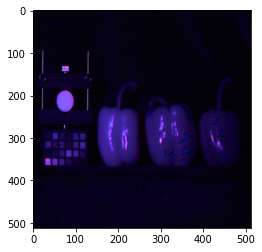

Epoch 1/200
1/1 [==============================] - 0s 303ms/step - loss: 0.4953 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 268ms/step - loss: 0.4952 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 247ms/step - loss: 0.4954 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 276ms/step - loss: 0.4952 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 258ms/step - loss: 0.4952 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 272ms/step - loss: 0.4953 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 272ms/step - loss: 0.4952 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 267ms/step - loss: 0.4953 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 257ms/step - loss: 0.4951 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 261ms/step - loss: 0.4954 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


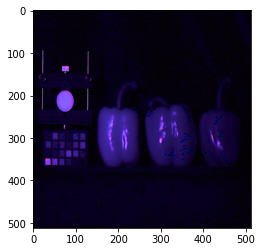

Epoch 1/200
1/1 [==============================] - 0s 301ms/step - loss: 0.5079 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 271ms/step - loss: 0.5078 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 269ms/step - loss: 0.5077 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 262ms/step - loss: 0.5077 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 271ms/step - loss: 0.5077 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 268ms/step - loss: 0.5077 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 264ms/step - loss: 0.5076 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 271ms/step - loss: 0.5078 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 284ms/step - loss: 0.5078 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 265ms/step - loss: 0.5078 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


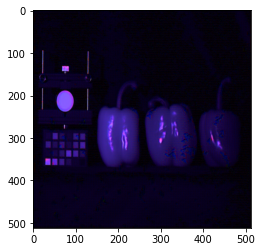

Epoch 1/200
1/1 [==============================] - 0s 291ms/step - loss: 0.5195 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 268ms/step - loss: 0.5195 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 263ms/step - loss: 0.5195 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 264ms/step - loss: 0.5194 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 264ms/step - loss: 0.5194 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 273ms/step - loss: 0.5195 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 264ms/step - loss: 0.5195 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 259ms/step - loss: 0.5194 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 272ms/step - loss: 0.5195 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 287ms/step - loss: 0.5196 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


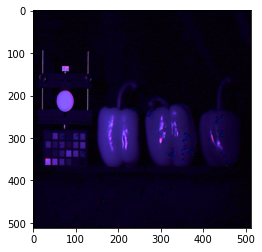

Epoch 1/200
1/1 [==============================] - 0s 284ms/step - loss: 0.5311 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 257ms/step - loss: 0.5311 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 272ms/step - loss: 0.5310 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 257ms/step - loss: 0.5310 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 275ms/step - loss: 0.5310 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 261ms/step - loss: 0.5309 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 265ms/step - loss: 0.5310 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 254ms/step - loss: 0.5310 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 286ms/step - loss: 0.5308 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 262ms/step - loss: 0.5308 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


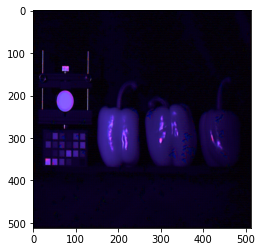

Epoch 1/200
1/1 [==============================] - 0s 322ms/step - loss: 0.5416 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 265ms/step - loss: 0.5416 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 258ms/step - loss: 0.5417 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 269ms/step - loss: 0.5416 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 265ms/step - loss: 0.5416 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 256ms/step - loss: 0.5417 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 284ms/step - loss: 0.5417 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 270ms/step - loss: 0.5419 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 267ms/step - loss: 0.5419 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 270ms/step - loss: 0.5417 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


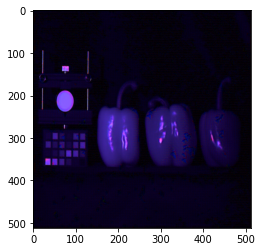

Epoch 1/200
1/1 [==============================] - 0s 299ms/step - loss: 0.5519 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 267ms/step - loss: 0.5518 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 258ms/step - loss: 0.5517 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 270ms/step - loss: 0.5518 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 257ms/step - loss: 0.5517 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 274ms/step - loss: 0.5517 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 267ms/step - loss: 0.5518 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 257ms/step - loss: 0.5517 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 265ms/step - loss: 0.5519 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 265ms/step - loss: 0.5518 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


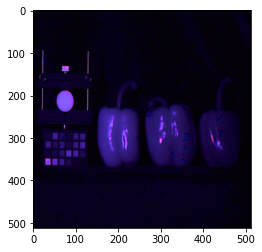

Epoch 1/200
1/1 [==============================] - 0s 281ms/step - loss: 0.5614 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 254ms/step - loss: 0.5615 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 255ms/step - loss: 0.5617 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 266ms/step - loss: 0.5616 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 258ms/step - loss: 0.5616 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 267ms/step - loss: 0.5617 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 275ms/step - loss: 0.5614 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 264ms/step - loss: 0.5615 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 278ms/step - loss: 0.5617 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 260ms/step - loss: 0.5617 - accuracy: 1.0000
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


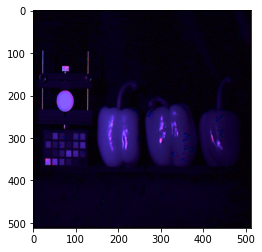

In [9]:
rho = 1
tau = 0.1*rho


optimizer = tf.keras.optimizers.Adam(5e-2)
model_gen = spectralGen(encoder=encoder, generator=generator, discriminator=discriminator, rho=rho)
model_gen.compile( optimizer=optimizer, loss=['binary_crossentropy'], metrics=['accuracy'])

alpha0 = tf.ones( (1,512,512,8) )
y_true = tf.ones( (1,127,127,1) )


u = tf.zeros( (1,512,512,31) )
y_pred = model_gen.predict([alpha0, target, u])

plt.imshow(y_pred[0,:,:,0] )
plt.show()
iters = 20

alpha = model_gen.alpha.alpha 
Da  = generator(alpha[None,:])
z = soft_threshold(  spacial_tv(Da) + u , tau, rho )

for i in range(iters):
  model_gen.fit( x=[alpha0, target, u - z], y = y_true , epochs=200  )
  alpha = model_gen.alpha.alpha 
  Da = generator(alpha[None,:])
  tv_Da = spacial_tv(Da)
  z = soft_threshold( tv_Da + u )
  u = u + tv_Da - z

  estimated = generator(alpha[None, :]).numpy()
  plt.imshow(estimated[0][:,:, RGB])
  plt.show()


  

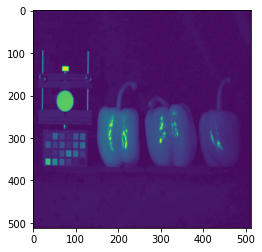

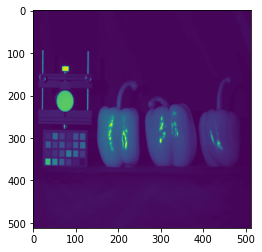

In [10]:
x = tf.reduce_mean(estimated, axis=-1)
plt.imshow(x[0])
plt.show()

plt.imshow(target[0,:,:,0])
plt.show()

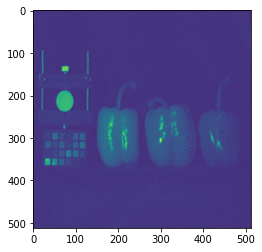

In [11]:
plt.imshow(alpha[ : ,:, 0])